# Supervised Learning

> WARNING: Copying the code of this Python script will result to a mark of zero. DO NOT REUSE THIS SCRIPT !!!

## Section 1 - Data Loading

In this experiment, we are going to examine several supervised learning algorithm together with ensemble learning. First of all, let's load the data. 

In [1]:
import subprocess
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install('openpyxl')

import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_excel('sample_data.xlsx')
feature_names = dataframe.columns.tolist()

label = dataframe['Group']

raw_feature = dataframe.drop(['Group'], axis=1)


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


## Section 2 - Naive Bayes

We start with Naive Bayes. We here use different combinations of raw features to test how well the Naive Bayes perform.  F1 Score and accuracy is used. You may want to refer to XIPU AI to ask how F1 score will work on multi class problem. Confusion matrix is also presented as a way of evaluation on the proposed system. Cross validation is also performed.

Over the lab session, you are more than welcome to try other features such as PCA coefficients as features, the ratio between features and even the sum and multiplication of features. Weighted features could also be a good alternative.

In [11]:
features_selected = ['E1','E2','E3','E4']

Accuracy: 0.45 (+/- 0.14)
F1 Score: 0.29 (+/- 0.07)


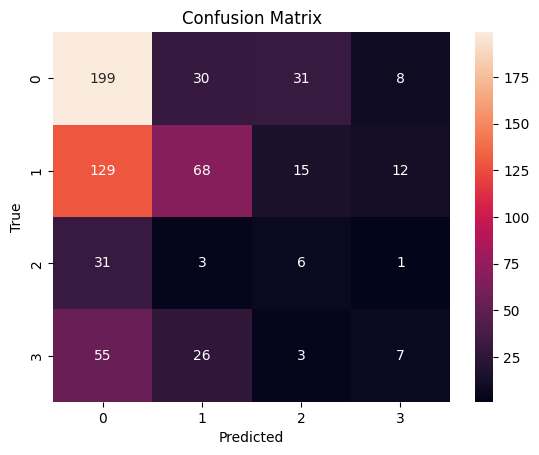

In [13]:
# Assume raw_features and label are your data
X_NB = dataframe[features_selected]

# Initialize a stratified 5-fold cross-validation scheme
skf_NB = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Initialize the classifier
clf_NB = GaussianNB()

# Perform cross-validation and calculate scores
accuracy_scores_NB = cross_val_score(clf_NB, X_NB, label, cv=skf_NB, scoring='accuracy')
f1_scores_NB = cross_val_score(clf_NB, X_NB, label, cv=skf_NB, scoring='f1_macro')

print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy_scores_NB.mean(), accuracy_scores_NB.std() * 2))
print("F1 Score: %0.2f (+/- %0.2f)" % (f1_scores_NB.mean(), f1_scores_NB.std() * 2))

y_pred_NB = cross_val_predict(clf_NB, X_NB, label, cv=skf_NB)

conf_mat_NB = confusion_matrix(label, y_pred_NB)

sns.heatmap(conf_mat_NB, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

## Section 3 - kNN algorithm

Next, let's try kNN algorithm. First, select the raw feature that you are going to consider then adjust the value of k.  To select the value of k, we could compare the system performance given value of k. Please set the values of k and compare the results. After you make a decision, you could decide your preferred value of k and then obtain the plot of confusion matrix. The F1 score and accuracy will be shown for your reference.

In [15]:
min_k = 5

In [40]:
max_k = 100

In [19]:
step_k = 15

In [29]:
features_knn = ['E1','E2','E4','E3']

In [38]:
neighbours = 44

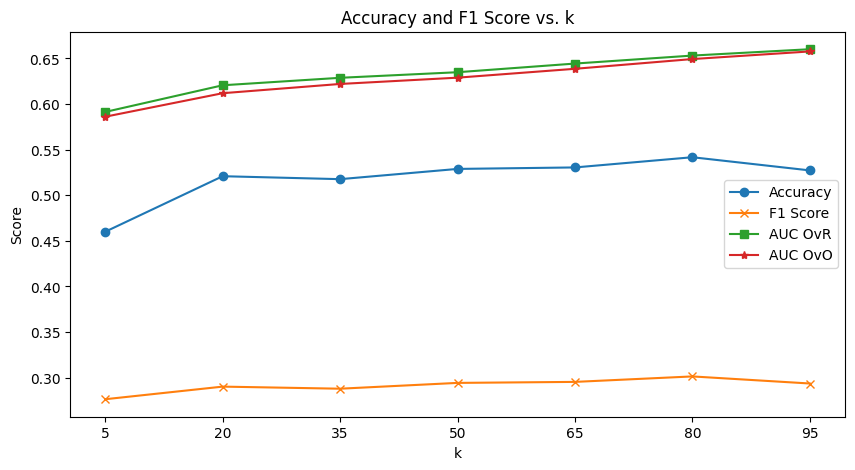

80


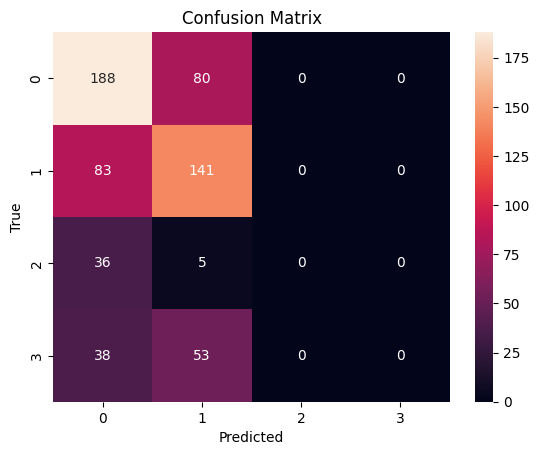

Accuracy: 0.53 (+/- 0.03)
F1 Score: 0.29 (+/- 0.01)


In [42]:
X_knn = dataframe[features_knn]

# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=neighbours)   # use any number you want

# Stratified KFold maintains the ratio of the classes in each fold
skf_knn = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Define a range of k values to be tested
k_values = range(min_k,max_k,step_k)

# Initialize lists to store accuracy and F1 scores for each value of k
accuracies = []
f1_scores = []
auc_ovr = []
auc_ovo = []

# Perform 5-fold cross validation for each value of k and calculate accuracy and F1 scores
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    acc_scores = cross_val_score(knn, X_knn, label, cv=kf, scoring='accuracy')
    f1_scores_cv = cross_val_score(knn, X_knn, label, cv=kf, scoring='f1_macro')
    auc_ovr_1 = cross_val_score(knn, X_knn, label, cv=kf, scoring='roc_auc_ovr')
    auc_ovo_1 = cross_val_score(knn, X_knn, label, cv=kf, scoring='roc_auc_ovo')
    accuracies.append(acc_scores.mean())
    f1_scores.append(f1_scores_cv.mean())
    auc_ovr.append(auc_ovr_1.mean())
    auc_ovo.append(auc_ovo_1.mean())

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', label='Accuracy')
plt.plot(k_values, f1_scores, marker='x', label='F1 Score')
plt.plot(k_values, auc_ovr, marker='s', label='AUC OvR')
plt.plot(k_values, auc_ovo, marker='*', label='AUC OvO')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Accuracy and F1 Score vs. k')
plt.xticks(k_values)
plt.legend()
plt.show()

print(k_values[accuracies.index(max(accuracies))])

# Perform cross validation and get the predictions on the validation set
y_pred_knn = cross_val_predict(knn, X_knn, label, cv=skf_knn)

# Calculate confusion matrix
conf_mat_knn = confusion_matrix(label, y_pred_knn)

# Plot the confusion matrix 
sns.heatmap(conf_mat_knn, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

accuracy_scores_knn = cross_val_score(knn, X_knn, label, cv=skf_knn, scoring='accuracy')
f1_scores_knn = cross_val_score(knn, X_knn, label, cv=skf_knn, scoring='f1_macro')

print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy_scores_knn.mean(), accuracy_scores_knn.std() * 2))
print("F1 Score: %0.2f (+/- %0.2f)" % (f1_scores_knn.mean(), f1_scores_knn.std() * 2))


# Section 4 - Decision Trees

In [52]:
features_DT = ['E1','E2','E3','E4']

In [56]:
crit_DT = 'log_loss'

In [58]:
min_sample_split_DT = 50

In [60]:
min_sample_leaf_DT = 40

In [62]:
max_depth_DT = 3

F1 Score: 0.29 (+/- 0.03)


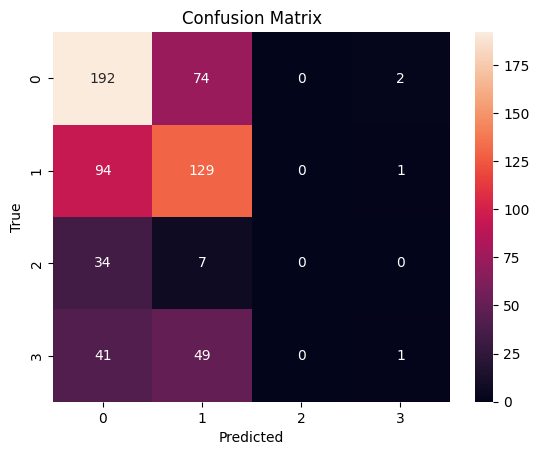

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

X_DT = dataframe[features_DT]

skf_DT = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

clf_DT = DecisionTreeClassifier(criterion=crit_DT,min_samples_split=min_sample_split_DT,min_samples_leaf=min_sample_leaf_DT,random_state=0)

f1_scores_DT = cross_val_score(clf_DT, X_DT, label, cv=skf_DT, scoring='f1_macro')

print("F1 Score: %0.2f (+/- %0.2f)" % (f1_scores_DT.mean(), f1_scores_DT.std() * 2))

y_pred_DT = cross_val_predict(clf_DT, X_DT, label, cv=skf_DT)

conf_mat_DT = confusion_matrix(label, y_pred_DT)

sns.heatmap(conf_mat_DT, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

clf_DT.fit(X_DT,label)

plt.figure(figsize=(100,100))
plot_tree(clf_DT, filled=True, feature_names=X_DT.columns)
plt.show()


## Section 4 - Ensemble Learning

To improve the system performance, we usually combine the results from a set of classification systems. We start from a hard vote on the prediction of previous classifiers. To achieve better results, you could change the configurations of previous classifiers. A F1 score is also shown below the confusion matrix.

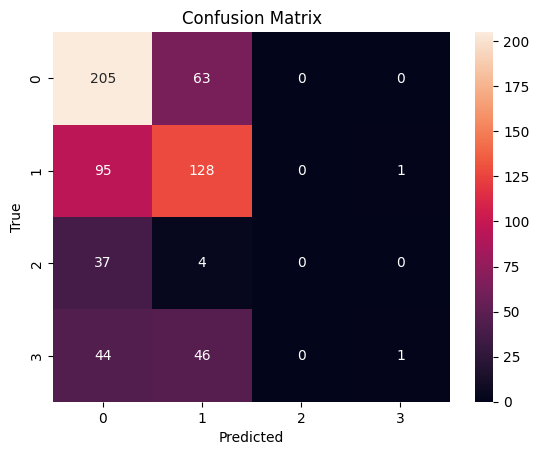

F1 Score: 0.30 


In [66]:
Y = np.array([y_pred_NB, y_pred_knn, y_pred_DT])
Y = Y.T
y_pred_ensamble = stats.mode(Y, axis=1, keepdims=False).mode

conf_mat_ensamble = confusion_matrix(label, y_pred_ensamble)

sns.heatmap(conf_mat_ensamble, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

f1_scores_ensamble = f1_score(label, y_pred_ensamble, average='macro')
print("F1 Score: %0.2f " % (f1_scores_ensamble))

Moreover, you could assign weight to the prediction of different classifiers such the class with highest weighted average probability would be taken as the prediction. Now discuss:

- How is the weighted average probability calculated

- How to assign weights to classifiers

Try yourself to seek the best performance of the ensemble classifier

In [68]:
w_NB = '1.0'

In [70]:
w_KNN = '1.0'

In [72]:
w_DT = '2.0'

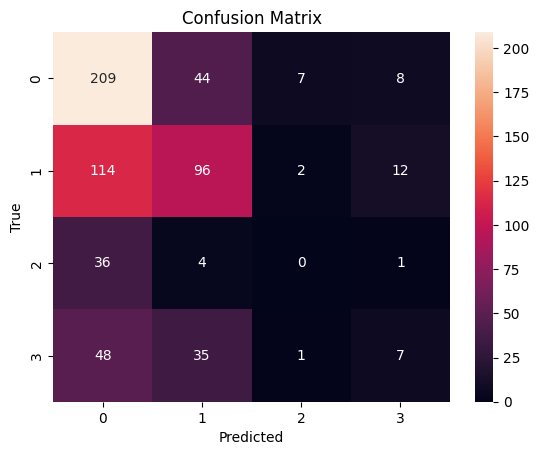

F1 Score: 0.30 


In [74]:
w_NB = float(w_NB)
w_KNN = float(w_KNN)
w_DT = float(w_DT)

y_pred_DT_prob = w_NB * cross_val_predict(clf_DT, X_DT, label, cv=skf_DT, method='predict_proba')
y_pred_knn_prob = w_KNN * cross_val_predict(knn, X_knn, label, cv=skf_knn, method='predict_proba')
y_pred_NB_prob = w_DT * cross_val_predict(clf_NB, X_NB, label, cv=skf_NB, method='predict_proba')

result_prob_matrix_raw = np.dstack((y_pred_DT_prob, y_pred_knn_prob, y_pred_NB_prob))
result_prob_matrix = np.mean(result_prob_matrix_raw, axis=2)

y_pred_sE = np.argmax(result_prob_matrix, axis=1) + 1

conf_mat_sE = confusion_matrix(label, y_pred_sE)
sns.heatmap(conf_mat_sE, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

f1_scores_ensamble = f1_score(label, y_pred_sE, average='macro')
print("F1 Score: %0.2f " % (f1_scores_ensamble))

Besides the presented study, you could also try class "VotingClassifier" and existing ensemble classifiers such as random forest. In your coursework, you must recommend a solution with a justification on the result you obtained in this experiment.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=52b3bb88-5e06-4a4c-827f-2ce22204e417' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>